# Analysis of scRNA-seq data

In [59]:
import scanpy as sc
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt

In [60]:
adata = sc.read_h5ad(
    '../processed/scRNAseq_featureCounts_NumReads.h5ad'
)
adata

AnnData object with n_obs × n_vars = 348 × 54456
    obs: 'sample_description', 'sample_genotype', 'sample_treatment', 'sample_sex', 'sample_litter', 'sample_mouseID'
    var: 'Length'

In [61]:
adata.obs['nCount_RNA'] = np.array(adata.X.sum(axis = 1)).flatten()
adata.obs['nFeature_RNA'] = np.array((adata.X > 0).sum(axis = 1)).flatten()
adata.obs['percent_mt'] = \
    np.array(adata[:, adata.var.index.str.startswith('mt')].X.sum(axis = 1)).flatten() / \
    np.array(adata.X.sum(axis = 1)).flatten()
adata.obs['percent_ribo'] = \
    np.array(adata[:, adata.var.index.str.match('^Rp[sl]')].X.sum(axis = 1)).flatten() / \
    np.array(adata.X.sum(axis = 1)).flatten()

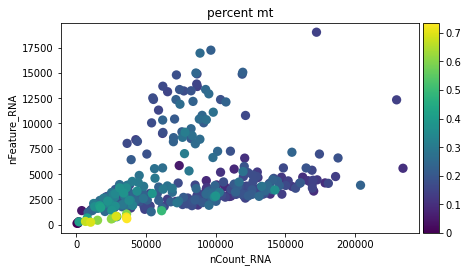

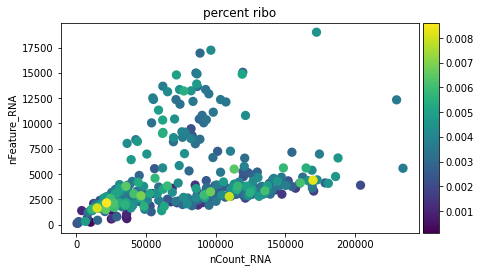

In [62]:
ax = sc.pl.scatter(
    adata, 
    'nCount_RNA', 
    'nFeature_RNA',
    show = False,
    color = 'percent_mt'
)
ax = sc.pl.scatter(
    adata, 
    'nCount_RNA', 
    'nFeature_RNA',
    show = False,
    color = 'percent_ribo'
)

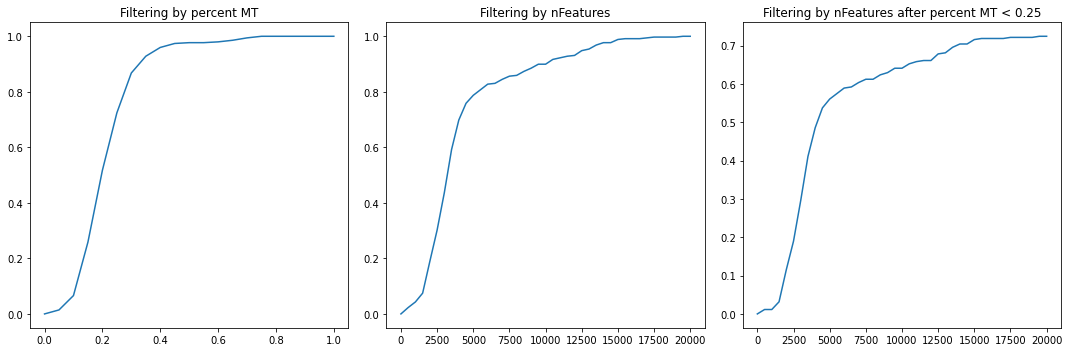

In [63]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
x1 = np.linspace(0, 1, 21)
data1 = [(adata.obs.percent_mt < i).sum()/len(adata.obs) for i in x1]
ax1.plot(x1, data1)
ax1.set_title('Filtering by percent MT')

x2 = np.linspace(0, 20000, 41)
data2 = [(adata.obs.nFeature_RNA < i).sum()/len(adata.obs) for i in x2]
ax2.plot(x2, data2)
ax2.set_title('Filtering by nFeatures')

data3 = [(adata[adata.obs.percent_mt < 0.25].obs.nFeature_RNA < i).sum()/len(adata.obs) for i in x2]
ax3.plot(x2, data3)
ax3.set_title('Filtering by nFeatures after percent MT < 0.25')

fig.set_figwidth(15)
fig.set_figheight(5)
fig.tight_layout()

In [66]:
adata = adata[(adata.obs.nFeature_RNA > 2000) & (adata.obs.percent_mt < 0.25), :].copy()

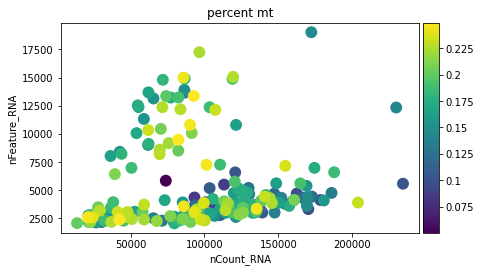

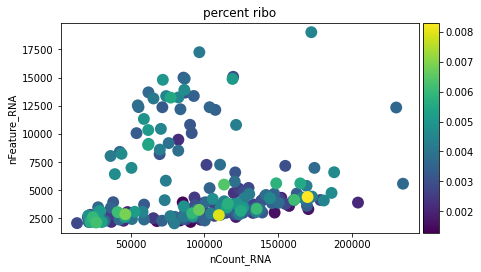

In [67]:
ax = sc.pl.scatter(
    adata, 
    'nCount_RNA', 
    'nFeature_RNA',
    show = False,
    color = 'percent_mt'
)
ax = sc.pl.scatter(
    adata, 
    'nCount_RNA', 
    'nFeature_RNA',
    show = False,
    color = 'percent_ribo'
)

In [68]:
adata.layers['counts'] = adata.X.copy()
#basically seurat preprocessing
sc.pp.normalize_total(
    adata, 
    target_sum = 1e4
)
sc.pp.log1p(adata)
sc.pp.scale(adata)
sc.pp.pca(
    adata, 
    n_comps = 50, 
    svd_solver = 'arpack'
)
sc.pp.neighbors(
    adata,
    n_neighbors = 15,
    knn = True
)
sc.tl.umap(adata)

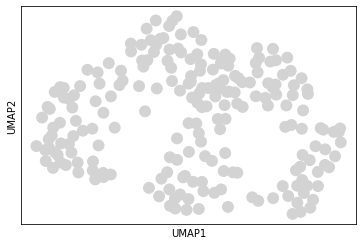

In [69]:
ax = sc.pl.umap(
    adata,
    show = False
)